In this notebook, we'll go through some exploratory analysis.  We'll look at the data briefly, examine the records of a few well known stars, and see if we can see which techniques finish fights more often.

*Disclaimner 1:  If your goals is to be an MMA fighter, this might be a good starting place but is not the definitive guide to MMA techniques. :)

**Disclaimer 2:  I do not recommend that you attemtp to be an MMA fighter. :)

In [1]:
# import the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.__version__

'0.11.1'

Much of the preprocessing for the fights dataset is done in cleanser.py which I wrote.

In [3]:
# import the class for loading the main fights data set
from cleanser import *

In [4]:
cleanser = RawFightsCleanser()
fights = cleanser.load_and_cleanse('raw_total_fight_data.csv', sep=';')

In [5]:
fights.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,b_ground_att,r_ground_suc,b_ground_suc,r_ground_ratio,b_ground_ratio,r_ground_pct,b_ground_pct,ground_diff,loser,r_b_winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,1,26,1,0.866667,1.0,86,100,25,Marlon Moraes,r
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72,16,37 of 40,42 of 52,...,0,1,0,1.000000,0.0,100,0,1,Jessica Eye,r
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52,36,104 of 200,68 of 185,...,0,0,0,0.000000,0.0,0,0,0,Donald Cerrone,r
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38,29,76 of 195,58 of 192,...,10,4,4,1.000000,0.4,100,40,0,Jimmie Rivera,b
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44,59,66 of 146,81 of 131,...,6,0,6,0.000000,1.0,0,100,-6,Tai Tuivasa,b


Much of this project is about who won - Red or Blue?  Remember, some person or people who manage fights put the two fighters into the "Red Corner" or the "Blue Corner".  I am not sure exactly who makes the decision.  But, as I understand it, the Red fighter is the one that is favored to win.

C:\Users\paulj_1e1uzlz\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


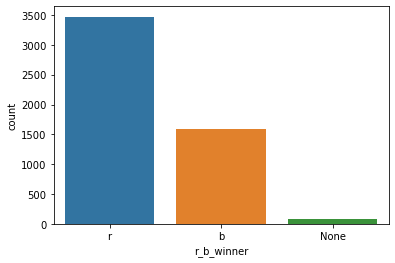

r       0.674572
b       0.309292
None    0.016135
Name: r_b_winner, dtype: float64

In [6]:
sns.countplot(fights.r_b_winner)
plt.show()
#fights.r_b_winner.value_counts()
fights.r_b_winner.value_counts() / fights.shape[0]

So Red won over 67% of the time.  Blue won about 31% of the time, and there were a few that ended in a tie.

So it would seem that:

<ol>
    <li>The human experts have some ability to predict who will win.</li>
    <li>There is room for improvement.</li>
</ol>

When we begin to make predictions later, anything we do to predict the winner will have to have a higher accuracy rate that 0.674572 to beat the experts and be of any value. Otherwise, we would just predict "red wins" every time.

There are a few things to look at while exploring the data:
    
<ul>
    <li>The distribution of some of the variables</li>
    <li>Effectiveness of some techniques, one of the questions I was going to answer</li>
    <li>A way to look at an individual person's record</li>
</ul>

## Question - what is the distribution of the independent variables?

In [7]:
#list(fights.columns)

Many of the variables are described <a href="https://www.kaggle.com/rajeevw/ufcdata?select=raw_total_fight_data.csv">here</a>, although it seems they left some out.  Also, I added a few in cleanser.py.  Many of the variables were in the form of "3 of 10", meaning out of 10 attempts (for a punch or kick etc), 3 landed.  In these cases, cleanser.py computes creates columns for attempts, success, ratio, and the difference of success between R and B.  The suffixes are "_att", "_suc", "_ratio" and "_diff".

Plotting all those variables might be overkill.  If the reader wants to plot them, go ahead.  But we will do a few.

First, let's look at the "sig_str" columns, which stand for "significant strike".

In [8]:
fights.columns

Index(['r_fighter', 'b_fighter', 'r_kd', 'b_kd', 'r_sig_str', 'b_sig_str',
       'r_sig_str_pct', 'b_sig_str_pct', 'r_total_str', 'b_total_str',
       ...
       'b_ground_att', 'r_ground_suc', 'b_ground_suc', 'r_ground_ratio',
       'b_ground_ratio', 'r_ground_pct', 'b_ground_pct', 'ground_diff',
       'loser', 'r_b_winner'],
      dtype='object', length=120)

In [9]:
params = {"hue":"r_b_winner", "kind":"kde"}

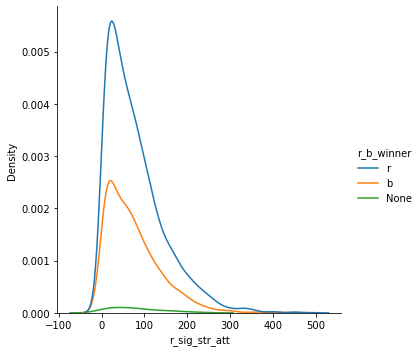

In [10]:
sns.displot(data=fights, x="r_sig_str_att", **params)

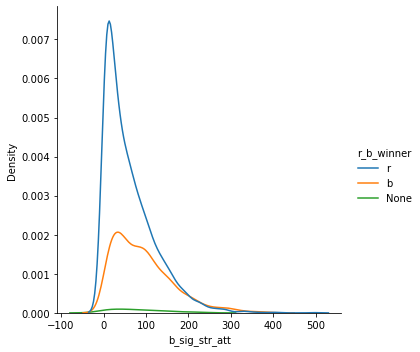

In [11]:
sns.displot(data=fights, x="b_sig_str_att", **params)

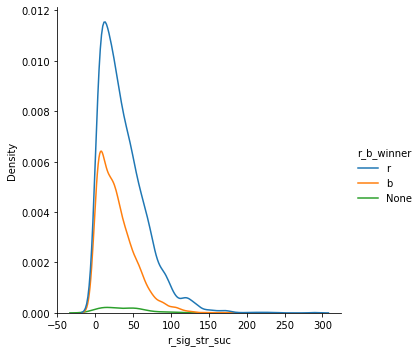

In [12]:
sns.displot(data=fights, x="r_sig_str_suc", **params)

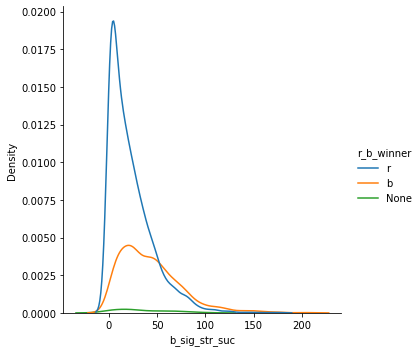

In [13]:
sns.displot(data=fights, x="b_sig_str_suc", **params)

So the significant strikes attempt and success numbers have sort of an exponential or fat tail distribution.  How about the percentss and differences?

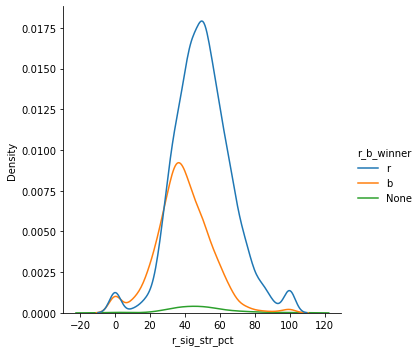

In [14]:
sns.displot(data=fights, x="r_sig_str_pct", **params)

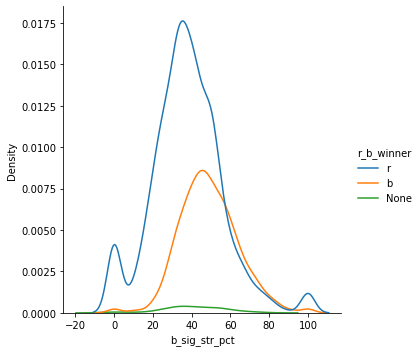

In [15]:
sns.displot(data=fights, x="b_sig_str_pct", **params)

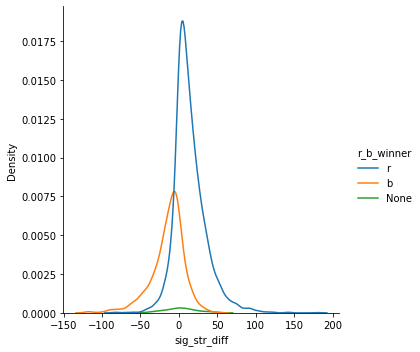

In [16]:
sns.displot(data=fights, x="sig_str_diff", **params)

Let's also look at how some diffs are correlated to each other.

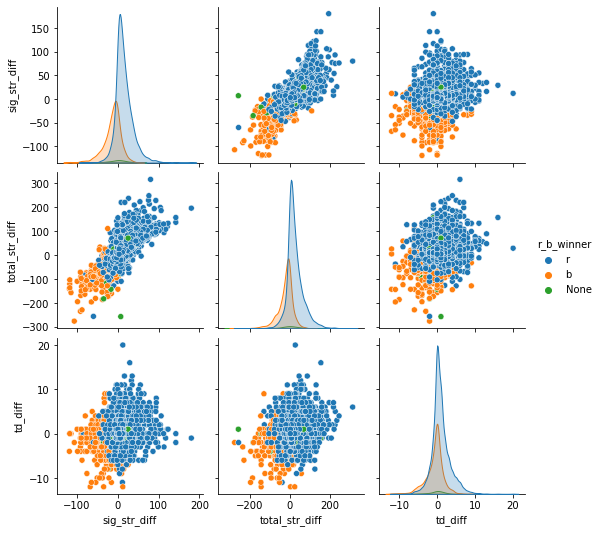

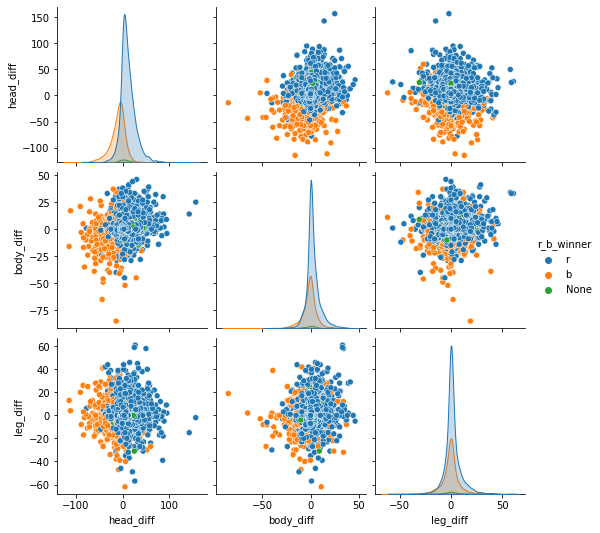

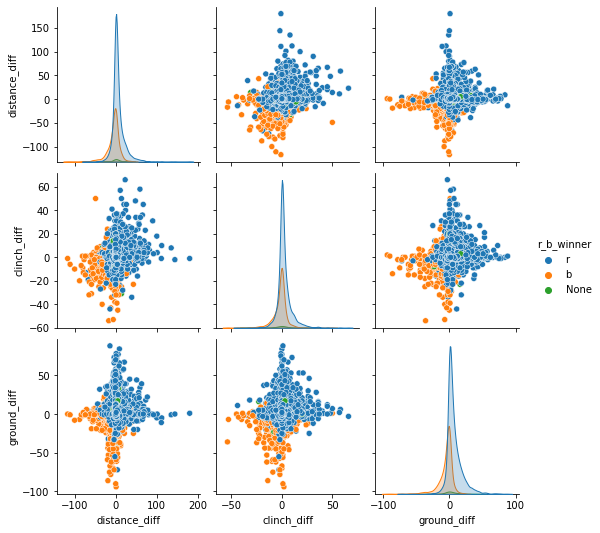

In [17]:
#sns.pairplot(fights[['sig_str_diff', 'total_str_diff', 'td_diff','head_diff','body_diff','leg_diff','distance_diff','clinch_diff','ground_diff','r_b_winner']], hue="r_b_winner")
sns.pairplot(fights[['sig_str_diff', 'total_str_diff', 'td_diff', 'r_b_winner']], hue="r_b_winner")
sns.pairplot(fights[['head_diff','body_diff','leg_diff', 'r_b_winner']], hue="r_b_winner")
sns.pairplot(fights[['distance_diff','clinch_diff','ground_diff', 'r_b_winner']], hue="r_b_winner")

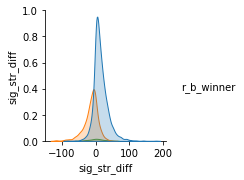

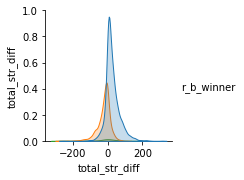

In [18]:
sns.pairplot(fights[['sig_str_diff', 'r_b_winner']], hue="r_b_winner")
sns.pairplot(fights[['total_str_diff', 'r_b_winner']], hue="r_b_winner")

I suspect that punches and kicks landed is more important in determining the outcome than how many were attempted.  And the difference between the two fighters is likely very impoortant.  That is why I had the code compute the _diff variables.  So let's look at the distribution of the diff variables.

In [21]:
diff_columns = [c for c in fights.columns if '_diff' in c]
#diff_columns

sig_str_diff


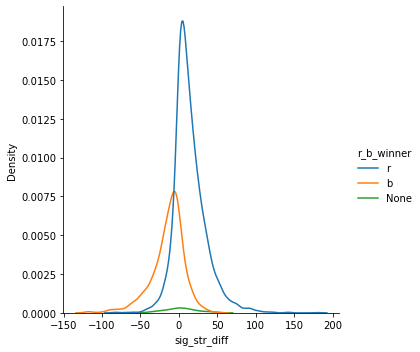

mean:   5.174572317262831
std:   24.959976650396005

total_str_diff


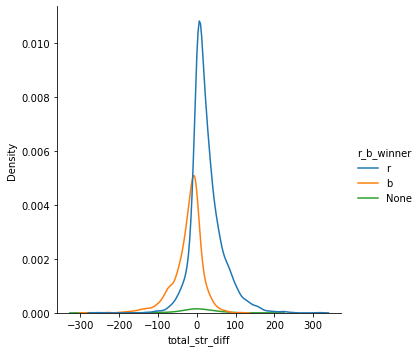

mean:   9.611003110419906
std:   45.75648972313954

td_diff


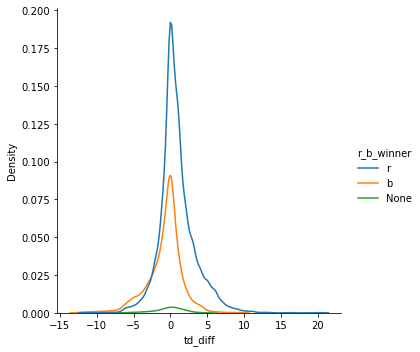

mean:   0.3495334370139969
std:   2.506283717997995

head_diff


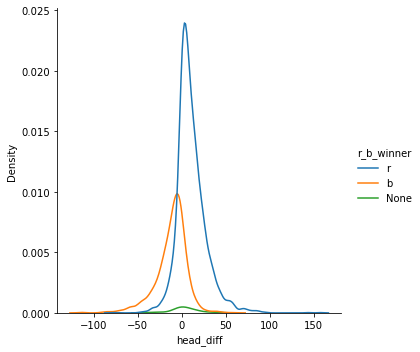

mean:   3.7323094867807156
std:   19.70423140851257

body_diff


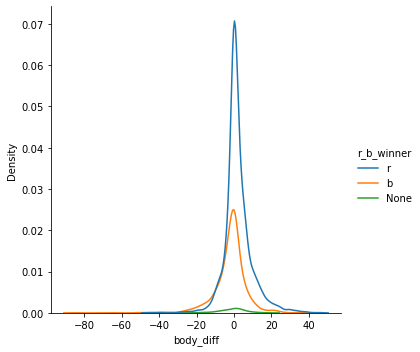

mean:   0.8505054432348367
std:   8.030154605225974

leg_diff


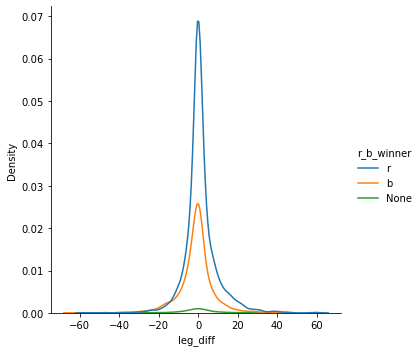

mean:   0.5917573872472783
std:   8.41792725228807

distance_diff


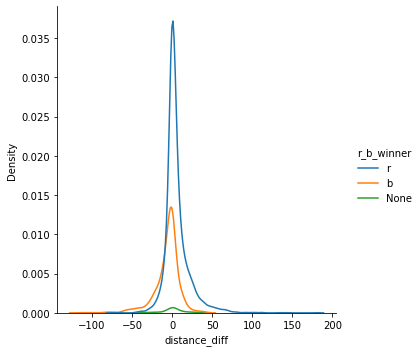

mean:   1.8596423017107309
std:   16.440600437509456

clinch_diff


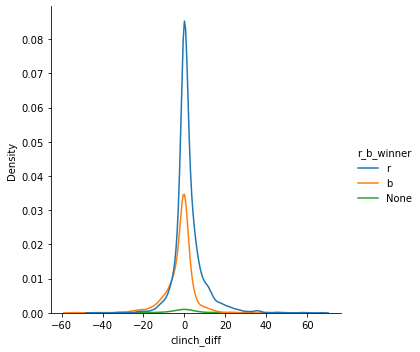

mean:   0.61450233281493
std:   7.444167163433408

ground_diff


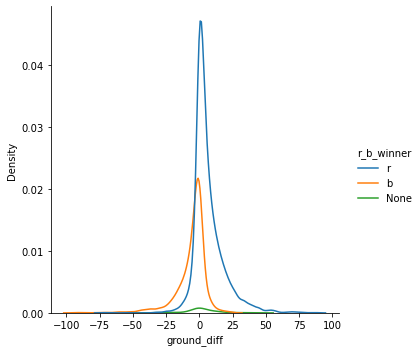

mean:   2.7004276827371694
std:   12.987118455702241



In [22]:
params = {"hue":"r_b_winner", "kind":"kde"}
for column in diff_columns:
    print(column)
    #sns.countplot(fights[column])
    #plt.show()
    #sns.displot(fights[column])
    #sns.displot(data=fights, x=column, hue="r_b_winner")
    sns.displot(data=fights, x=column, **params)
    plt.show()
    print('mean:  ', fights[column].mean())
    print('std:  ', fights[column].std())
    print()

We see that they are symmetrical abuot 0.  The spikes in the middle are high enough that they probably not <a href="https://en.wikipedia.org/wiki/Normal_distribution">normally distributed</a>.  Maybe a strange double sided exponential.  If that is the case, you might call it a "Janus Exponential", a term I just made up.  But despite the slightly strange distribution, because they are symmetric about 0, I suspect they will be fine for use in Logistic Regression and Neural Networks.  I suspect that if they were exponential / fat tail, they would not work.

## Question - what techniques are more effective?

Now go back to the idea of how fights end and investigate what is more effective.
First, let's look at how fights ended.

A major question I had is

<b>Which is more effective, grappling or striking?</b>

It is hard to look at the totality of the fight to see what worked.  Fortunatly, the data set does contain a column called "win by", which seems to be what happend just before the fight was ended - a choke, a barrage of punches, etc.  Se we can approximate the question by translating it into this one:

<b>Are more fights ended by submission or striking?</b>

As I said in the introductory page, when there is a "submission", the losing figher has "tapped" and admitted defeat, typically due to a joint lock or a choke.

In [23]:
fights.win_by.value_counts()

Decision - Unanimous       1737
KO/TKO                     1647
Submission                 1083
Decision - Split            486
TKO - Doctor's Stoppage      70
Decision - Majority          56
Overturned                   35
DQ                           15
Could Not Continue           13
Other                         2
Name: win_by, dtype: int64

In [24]:
fights.win_by.value_counts() / fights.shape[0]

Decision - Unanimous       0.337675
KO/TKO                     0.320179
Submission                 0.210537
Decision - Split           0.094479
TKO - Doctor's Stoppage    0.013608
Decision - Majority        0.010886
Overturned                 0.006804
DQ                         0.002916
Could Not Continue         0.002527
Other                      0.000389
Name: win_by, dtype: float64

We see that the "Submission" category is a minority of the win by values (about 21%).  Assuming that the Decisions and knock outs are typically a result of striking and not the loser tapping, we can conclude that the good majority of fights (about 79%) are won by striking techniques.

Another question might be <b>has the rate of winning by submission has changed over time?<b>  Maybe the strategy has changed since the early days where Royce Gracie shocked so many people by submitting them with a lesser know style.
Let's graph the number of fights that have ended by submission as a function of time.

In [25]:
fights['was_sub'] = fights.win_by == 'Submission'

In [26]:
fights['was_sub'] = fights.win_by.apply(lambda x: 1 if x == 'Submission' else 0)

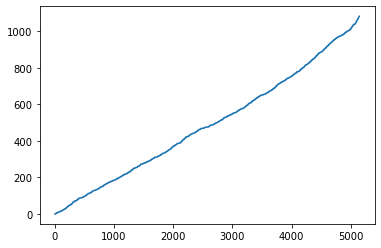

In [27]:
plt.plot([x for x in range(fights.shape[0])], fights.was_sub.cumsum())

The slope of the ratio between submissions and total fights has remained relatively constant.

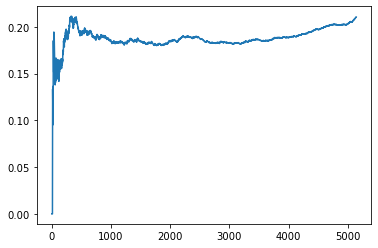

In [28]:
# Another way to look at it.  Plot the current ratio of submissions to all fights over time.
i = [x for x in range(fights.shape[0])]
plt.plot(i, fights.was_sub.cumsum() / i)

Again, it quickly converges to a value in the range of .2.  It dipped a little but then went back up.

Another question we can ask is "exactly which move was used?"  Within each of the two groups (striking vs grappling), this could tell us which move was more effecitve.

The other data set has a column with more detail on the technique used at the finish.

In [29]:
ufc = pd.read_csv('ufc-master.csv')

In [30]:
ufc.shape

(4292, 110)

In [31]:
ufc.finish.value_counts()

U-DEC         1543
KO/TKO        1291
SUB            758
S-DEC          435
M-DEC           26
DQ              12
Overturned       2
Name: finish, dtype: int64

In [32]:
(ufc.finish == 'SUB').sum()/ ufc.finish.value_counts().sum()

0.18637816572412097

So in this data set, about 18.6% are ending in a submission.  It is a little less than the other one, but this data set covers a slightly different time period and about 5% of the values in this column are missing.

This data set has a finish_details column.  Many of the values are blank but let's still look at it.

In [33]:
ufc.finish_details.value_counts()

Punch                 485
Punches               429
Rear Naked Choke      310
Guillotine Choke      143
Kick                  113
Armbar                 88
Knee                   64
Arm Triangle           58
Elbows                 56
Triangle Choke         45
Elbow                  27
D'Arce Choke           24
Kimura                 20
Flying Knee            19
Knees                  16
Anaconda Choke         14
Other - Choke          14
Kneebar                12
Heel Hook              10
Spinning Back Fist      6
Spinning Back Kick      6
Slam                    6
Other - Lock            5
Neck Crank              5
North-South Choke       4
Injury                  3
Kicks                   2
Omoplata                2
Keylock                 1
Peruvian Necktie        1
Ankle Lock              1
Name: finish_details, dtype: int64

For the sake of this, let's combine things like "Punch" and "Punches" into one category.

In [34]:
ufc['finish_details'] = ufc['finish_details'].apply(lambda s: 'Punches' if s == 'Punch' else s)
ufc['finish_details'] = ufc['finish_details'].apply(lambda s: 'Kicks' if s == 'Kick' else s)
ufc['finish_details'] = ufc['finish_details'].apply(lambda s: 'Elbows' if s == 'Elbow' else s)
ufc['finish_details'] = ufc['finish_details'].apply(lambda s: 'Knees' if s == 'Knee' else s)
ufc['finish_details'] = ufc['finish_details'].apply(lambda s: 'Knees' if s == 'Flying Knee' else s)

In [35]:
ufc.finish_details.value_counts()

Punches               914
Rear Naked Choke      310
Guillotine Choke      143
Kicks                 115
Knees                  99
Armbar                 88
Elbows                 83
Arm Triangle           58
Triangle Choke         45
D'Arce Choke           24
Kimura                 20
Other - Choke          14
Anaconda Choke         14
Kneebar                12
Heel Hook              10
Spinning Back Kick      6
Slam                    6
Spinning Back Fist      6
Other - Lock            5
Neck Crank              5
North-South Choke       4
Injury                  3
Omoplata                2
Ankle Lock              1
Keylock                 1
Peruvian Necktie        1
Name: finish_details, dtype: int64

Let's break it down for submissions and non submissions.

In [36]:
subs = ufc[ufc.finish == 'SUB']
not_sub = ufc[ufc.finish != 'SUB']

Of the submissions, which technique was the most common way to end the fight?

In [37]:
subs.finish_details.value_counts()

Rear Naked Choke     309
Guillotine Choke     143
Armbar                88
Arm Triangle          58
Triangle Choke        45
D'Arce Choke          23
Kimura                20
Other - Choke         14
Anaconda Choke        14
Kneebar               12
Heel Hook             10
Other - Lock           5
Neck Crank             5
North-South Choke      4
Injury                 3
Omoplata               2
Peruvian Necktie       1
Keylock                1
Ankle Lock             1
Name: finish_details, dtype: int64

So if you are going to submit somebody, the <a href="https://en.wikipedia.org/wiki/Rear_naked_choke">rear naked choke</a> seems to be your most likely option.  The also popular <a href="https://en.wikipedia.org/wiki/Guillotine_choke">Guillotine</a> and <a href="https://en.wikipedia.org/wiki/Armlock#Armbar">Armbar</a> are also common.

One of the most popular chokes in Jiu Jitsu, the <a href="https://en.wikipedia.org/wiki/Triangle_choke">Triangle Choke</a>, is fifth on the list.  I would have expected it to be higher, but I guess the reason we do analysis like to is to learn what is actually true and not was we assume is true.

Also, I notice that heel hooks, which are popular in Brazillian Jiu Jitsu competition right now, are low on the list.
One of my favorite moves, the Omoplata, has finished someone off 2 times in the UFC.  It looks flashy...but apparently you should have a backup.

Let's look at fights that ended due to striking.

In [38]:
not_sub.finish_details.value_counts()

Punches               914
Kicks                 115
Knees                  99
Elbows                 83
Spinning Back Kick      6
Spinning Back Fist      6
Slam                    6
Rear Naked Choke        1
D'Arce Choke            1
Name: finish_details, dtype: int64

In [39]:
'''not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Punches' if s == 'Punch' else s)
not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Kicks' if s == 'Kick' else s)
not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Elbows' if s == 'Elbow' else s)
not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Knees' if s == 'Knee' else s)
not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Knees' if s == 'Flying Knee' else s)'''

"not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Punches' if s == 'Punch' else s)\nnot_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Kicks' if s == 'Kick' else s)\nnot_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Elbows' if s == 'Elbow' else s)\nnot_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Knees' if s == 'Knee' else s)\nnot_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Knees' if s == 'Flying Knee' else s)"

Based on this, punches seems the most common way to end the fight.  This does not capture all the things that went into it before that could have gotten the opponent tired and battered.  So I cannot rule out kicks as a way to weaken an opponent before allowing punches to finish him off.  All the same, if you were training to be a UFC fighter, I would focus on punches more than flying back kicks out of kung fu movies.

## Question - Just out of curiosity's sake, can we look at the records of individual fighters?

We'll start with <a href="https://en.wikipedia.org/wiki/Royce_Gracie">Royce Gracie</a>, being probably the first UFC star and the hero of the style of Jiu Jitsu I have been studying*.

*Disclaimer.  I have reached the level of...2nd Degree White Belt.  Sigh.

In [40]:
fights[(fights.r_fighter == 'Royce Gracie') | (fights.b_fighter == 'Royce Gracie')][['r_fighter', 'b_fighter', 'winner', 'loser', 'win_by']]

,r_fighter,b_fighter,winner,loser,win_by
4590,Matt Hughes,Royce Gracie,Matt Hughes,Royce Gracie,KO/TKO
5099,Ken Shamrock,Royce Gracie,None,None,Other
5107,Royce Gracie,Dan Severn,Royce Gracie,Dan Severn,Submission
5109,Royce Gracie,Keith Hackney,Royce Gracie,Keith Hackney,Submission
5113,Royce Gracie,Ron van Clief,Royce Gracie,Ron van Clief,Submission
5117,Royce Gracie,Kimo Leopoldo,Royce Gracie,Kimo Leopoldo,Submission
5121,Royce Gracie,Patrick Smith,Royce Gracie,Patrick Smith,KO/TKO
5122,Royce Gracie,Remco Pardoel,Royce Gracie,Remco Pardoel,Submission
5124,Royce Gracie,Jason DeLucia,Royce Gracie,Jason DeLucia,Submission
5128,Royce Gracie,Minoki Ichihara,Royce Gracie,Minoki Ichihara,Submission


OK, that wasn't difficult.  Let's write functions to get the fights for any given fighter, and their numeric record.

In [41]:
def get_fights_for_fighter(fighter_name, fights_df = fights):
    return fights_df[(fights_df.r_fighter == fighter_name) | (fights_df.b_fighter == fighter_name)]

In [42]:
get_fights_for_fighter('Royce Gracie')[['r_fighter', 'b_fighter', 'winner', 'loser', 'win_by']]

,r_fighter,b_fighter,winner,loser,win_by
4590,Matt Hughes,Royce Gracie,Matt Hughes,Royce Gracie,KO/TKO
5099,Ken Shamrock,Royce Gracie,None,None,Other
5107,Royce Gracie,Dan Severn,Royce Gracie,Dan Severn,Submission
5109,Royce Gracie,Keith Hackney,Royce Gracie,Keith Hackney,Submission
5113,Royce Gracie,Ron van Clief,Royce Gracie,Ron van Clief,Submission
5117,Royce Gracie,Kimo Leopoldo,Royce Gracie,Kimo Leopoldo,Submission
5121,Royce Gracie,Patrick Smith,Royce Gracie,Patrick Smith,KO/TKO
5122,Royce Gracie,Remco Pardoel,Royce Gracie,Remco Pardoel,Submission
5124,Royce Gracie,Jason DeLucia,Royce Gracie,Jason DeLucia,Submission
5128,Royce Gracie,Minoki Ichihara,Royce Gracie,Minoki Ichihara,Submission


Now let's make a way to just get the number of wins, losses, and ties.

In [43]:
class RecordSummary:
    def __init__(self, name, wins, losses, ties):
        self.name = name
        self.wins = wins
        self.losses = losses
        self.ties = ties
        
    def __str__(self):
        return '{ name: ' + self.name + ', ' + str(self.wins) + ', ' + str(self.losses) + ', ' + str(self.ties) + ', ' + str(self.wins / (self.wins + self.losses)) + '}'
    
    def __repr__(self):
        return self.__str__()
    
    def __lt__(self, other):
        return (self.wins < other.wins)
    
    

In [44]:
def get_record_summary(fighter_name, fights_df = fights):
    summary = {}
    summary['wins'] = (fights_df['winner'] == fighter_name).sum()
    summary['losses'] = (fights_df['winner'] == fighter_name).sum()
    summary['losses'] = (fights_df['loser'] == fighter_name).sum()
    summary['draws'] = (((fights_df['r_fighter'] == fighter_name) | (fights_df['b_fighter'] == fighter_name) ) & (fights_df['winner'] == 'None')).sum()
    summary['win loss ratio'] = summary ['wins'] / (summary['wins'] + summary['losses'])
    
    return summary

In [45]:
print(get_record_summary('Royce Gracie', fights))

{'wins': 11, 'losses': 1, 'draws': 1, 'win loss ratio': 0.9166666666666666}


Matt Hughes beat Royce Gracie.  And he is also one of the few fighters famous enough for me to have heard of.  Let's look at his record.

In [46]:
print(get_record_summary('Matt Hughes'))

{'wins': 18, 'losses': 7, 'draws': 0, 'win loss ratio': 0.72}


In [47]:
#get_fights_for_fighter('Matt Hughes')[['winner', 'win_by', 'loser']]

Another famous UFC figher is George St. Pierre.  Let's look at his record.

In [48]:
get_fights_for_fighter('Georges St-Pierre')[['winner', 'win_by', 'loser']]

,winner,win_by,loser
793,Georges St-Pierre,Submission,Michael Bisping
2660,Georges St-Pierre,Decision - Split,Johny Hendricks
2923,Georges St-Pierre,Decision - Unanimous,Nick Diaz
3047,Georges St-Pierre,Decision - Unanimous,Carlos Condit
3552,Georges St-Pierre,Decision - Unanimous,Jake Shields
3644,Georges St-Pierre,Decision - Unanimous,Josh Koscheck
3835,Georges St-Pierre,Decision - Unanimous,Dan Hardy
3997,Georges St-Pierre,Decision - Unanimous,Thiago Alves
4092,Georges St-Pierre,KO/TKO,BJ Penn
4191,Georges St-Pierre,Decision - Unanimous,Jon Fitch


Hmm.  I wonder who has the "best" record.  It is hard to define who has the best record, but I'll start by sorting them by number of wins

In [49]:
# I wonder who has the "best" record.  It is hard to define who has the best record, but I'll start by sorting them by number of wins.
all_fighters = set(fights.r_fighter).union(set(fights.b_fighter))
#len(all_fighters)

In [50]:
all_summaries = []
for fighter in all_fighters:
    #print(fighter, ':  ', get_record_summary(fighter))
    m = get_record_summary(fighter)
    rs = RecordSummary(fighter, m['wins'], m['losses'], m['draws'])
    all_summaries.append(rs)

C:\Users\paulj_1e1uzlz\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys


In [51]:
all_summaries.sort()
all_summaries = all_summaries[::-1]
all_summaries[:20]

[{ name: Donald Cerrone, 23, 9, 0, 0.71875},
 { name: Michael Bisping, 20, 9, 0, 0.6896551724137931},
 { name: Georges St-Pierre, 20, 2, 0, 0.9090909090909091},
 { name: Demian Maia, 20, 9, 0, 0.6896551724137931},
 { name: Jim Miller, 19, 12, 1, 0.6129032258064516},
 { name: Matt Hughes, 18, 7, 0, 0.72},
 { name: Rafael Dos Anjos, 18, 9, 0, 0.6666666666666666},
 { name: Diego Sanchez, 18, 11, 0, 0.6206896551724138},
 { name: Jon Jones, 18, 1, 1, 0.9473684210526315},
 { name: Anderson Silva, 17, 6, 1, 0.7391304347826086},
 { name: Frankie Edgar, 17, 6, 1, 0.7391304347826086},
 { name: Dustin Poirier, 17, 4, 1, 0.8095238095238095},
 { name: Andrei Arlovski, 16, 12, 1, 0.5714285714285714},
 { name: Frank Mir, 16, 11, 0, 0.5925925925925926},
 { name: Lyoto Machida, 16, 8, 0, 0.6666666666666666},
 { name: Gleison Tibau, 16, 12, 0, 0.5714285714285714},
 { name: Chuck Liddell, 16, 7, 0, 0.6956521739130435},
 { name: Max Holloway, 16, 4, 0, 0.8},
 { name: Randy Couture, 16, 8, 0, 0.66666666666

So the above are the 20 people with the most wins.  Of those, notice George St. Pierre and Jon Jones having very few losses.

Note:  Some of these records, such as Jon Jones, are slightly out of date.

In [52]:
get_fights_for_fighter('Jon Jones', fights)[['winner', 'win_by', 'loser', 'date']]

,winner,win_by,loser,date
149,Jon Jones,Decision - Unanimous,Anthony Smith,"March 02, 2019"
223,Jon Jones,KO/TKO,Alexander Gustafsson,"December 29, 2018"
893,None,Overturned,None,"July 29, 2017"
1505,Jon Jones,Decision - Unanimous,Ovince Saint Preux,"April 23, 2016"
2103,Jon Jones,Decision - Unanimous,Daniel Cormier,"January 03, 2015"
2464,Jon Jones,Decision - Unanimous,Glover Teixeira,"April 26, 2014"
2731,Jon Jones,Decision - Unanimous,Alexander Gustafsson,"September 21, 2013"
2875,Jon Jones,KO/TKO,Chael Sonnen,"April 27, 2013"
3101,Jon Jones,Submission,Vitor Belfort,"September 22, 2012"
3247,Jon Jones,Decision - Unanimous,Rashad Evans,"April 21, 2012"


Having looked at some distributions, briefly looked at which techniques seem more effective, and looked at a few records, we'll quit the explotory analysis and begin to focus on prediction in other notebooks.